# 언론 수용자 설문 조사 분석

In [100]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기

In [101]:
data = pd.read_csv("data/2. 2024 언론수용자 조사_최종데이터.csv")
data

,ID,SQ1,DQ2,DQ3,Q1,Q2A_1,Q2B_1,Q3_1_1,Q3_1_2,Q3_2_1,...,BQ2,BQ3,BQ4,BQ5,BQ6,BQ7,BQ8,BQ9,BQ10,WT
0,1010,1,2,34,2,,,,,,...,2,2,6,8,3,3,2,1,2,1.568452
1,1014,1,2,36,2,,,,,,...,2,3,10,8,3,2,1,2,2,1.568452
2,1017,1,1,36,2,,,,,,...,1,3,6,5,2,2,4,1,2,1.204343
3,1020,1,2,29,2,,,,,,...,1,2,6,3,2,2,1,2,2,0.916556
4,1023,1,1,49,2,,,,,,...,2,2,2,9,3,4,3,1,2,3.123587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,500008,17,1,54,2,,,,,,...,1,2,1,3,1,2,2,1,2,0.407848
5996,500009,17,2,48,2,,,,,,...,2,2,3,4,2,4,4,1,2,0.419665
5997,500010,17,2,55,2,,,,,,...,1,2,3,4,4,5,2,1,2,0.384253
5998,500011,17,2,61,2,,,,,,...,1,2,2,4,3,3,2,1,2,0.331283


# 2. 데이터 정보 확인

In [102]:
data.shape

(6000, 237)

In [103]:
data.columns

Index(['ID', 'SQ1', 'DQ2', 'DQ3', 'Q1', 'Q2A_1', 'Q2B_1', 'Q3_1_1', 'Q3_1_2',
       'Q3_2_1',
       ...
       'BQ2', 'BQ3', 'BQ4', 'BQ5', 'BQ6', 'BQ7', 'BQ8', 'BQ9', 'BQ10', 'WT'],
      dtype='object', length=237)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 237 entries, ID to WT
dtypes: float64(1), int64(120), object(116)
memory usage: 10.8+ MB


# 3. 데이터 필터링

## 1) 필수 카테고리 추출

In [105]:
# ---------전체 언론 매체 이용 현황----------
# 연령 : DQ3
# 뉴스 및 시사정보 주 이용 경로 : Q76
# ---------디지털 언론 매체 이용 현황---------
# 인터넷을 통한 뉴스 이용 현황(연령별) : Q24_1(모바일) + Q24_2(PC)
#

new_data = data[["DQ3", "Q76", "Q26_1", "Q26_2"]]
print(new_data)

      DQ3   Q76 Q26_1 Q26_2
0      34     5     1     2
1      36  9998            
2      36     2     1     2
3      29  9998            
4      49     5           2
...   ...   ...   ...   ...
5995   54     2     1      
5996   48     2     1      
5997   55     2     1      
5998   61     2            
5999   72     2     1      

[6000 rows x 4 columns]


In [106]:
print(new_data["Q76"].dtype)

int64


In [107]:
new_data["Q76"] = new_data["Q76"].replace(9998, pd.NA)
new_data = new_data.dropna().reset_index(drop=True)
print(new_data)

      DQ3 Q76 Q26_1 Q26_2
0      34   5     1     2
1      36   2     1     2
2      49   5           2
3      43   5     1      
4      53   3     1      
...   ...  ..   ...   ...
5475   54   2     1      
5476   48   2     1      
5477   55   2     1      
5478   61   2            
5479   72   2     1      

[5480 rows x 4 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_26632\2458841676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Q76"] = new_data["Q76"].replace(9998, pd.NA)


In [108]:
# ---------전체 언론 매체 이용 현황----------
# 연령 : DQ3
# 뉴스 및 시사정보 주 이용 경로 : Q76
# 경로별 이용자 수를 연령별로 집계
route_stats = new_data.groupby("DQ3")["Q76"].value_counts().unstack(fill_value=0)
print(route_stats)
# 비율로 보기 원한다면:
route_ratio = route_stats.div(route_stats.sum(axis=1), axis=0) * 100

print(route_ratio)

# ---------디지털 언론 매체 이용 현황---------
# 인터넷을 통한 뉴스 이용 현황(연령별) : Q24_1(모바일) + Q24_2(PC)



Q76  1   2   3   4   5   6   7   8   9   10  11  12
DQ3                                                
19    0   4   0   0   9   0   0   1   1   0   0   0
20    0   5   0   0  19   0   2   0   2   0   1   0
21    1   6   0   0  24   0   0   0   0   0   0   1
22    0   3   0   0  26   0   0   1   2   5   0   3
23    0   4   0   0  18   0   1   1   1   2   1   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
88    0   4   0   0   0   0   0   0   0   0   0   0
89    0   1   0   0   0   0   0   0   0   0   0   0
90    0   1   0   0   0   0   0   0   0   0   0   0
92    0   1   0   0   0   0   0   0   0   0   0   0
95    0   3   0   0   0   0   0   1   0   0   0   0

[74 rows x 12 columns]
Q76     1           2    3    4          5    6         7          8   \
DQ3                                                                     
19   0.000   26.666667  0.0  0.0  60.000000  0.0  0.000000   6.666667   
20   0.000   17.241379  0.0  0.0  65.517241  0.0  6.896552   0.000000   
21   3.1

In [109]:
import pandas as pd

# 연령대 구간 설정
bins = [20, 30, 40, 50, 60, 70, 80]  # 80은 upper bound
labels = ['20대', '30대', '40대', '50대', '60대', '70대']

# 연령대 컬럼 추가
new_data['연령대'] = pd.cut(new_data['DQ3'], bins=bins, labels=labels, right=False)
new_data

,DQ3,Q76,Q26_1,Q26_2,연령대
0,34,5,1,2,30대
1,36,2,1,2,30대
2,49,5,,2,40대
3,43,5,1,,40대
4,53,3,1,,50대
...,...,...,...,...,...
5475,54,2,1,,50대
5476,48,2,1,,40대
5477,55,2,1,,50대
5478,61,2,,,60대


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [111]:
label_map = {
    1: "종이신문",
    2: "텔레비전",
    3: "라디오",
    4: "잡지",
    5: "인터넷포털/검색엔진",
    6: "언론사 웹사이트나 앱",
    7: "SNS",
    8: "메신저",
    9: "온라인 동영상 플랫폼",
    10: "숏폼",
    11: "인공지능 스피커",
    12: "이메일 뉴스레터",
    13: "없음"
}

In [112]:
new_data["Q76_라벨"] = new_data["Q76"].map(label_map)

In [113]:
stats = new_data.groupby('연령대')['Q76'].value_counts().unstack(fill_value=0)

C:\Users\user\AppData\Local\Temp\ipykernel_26632\3355134429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = new_data.groupby('연령대')['Q76'].value_counts().unstack(fill_value=0)


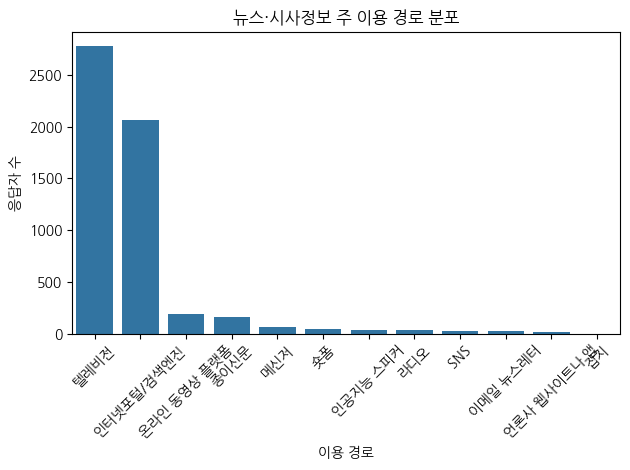

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=new_data, x="Q76_라벨", order=new_data["Q76_라벨"].value_counts().index)
plt.xticks(rotation=45)
plt.title("뉴스·시사정보 주 이용 경로 분포")
plt.xlabel("이용 경로")
plt.ylabel("응답자 수")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_26632\1576123867.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = new_data.groupby("연령대")["Q76_라벨"].value_counts().unstack(fill_value=0)


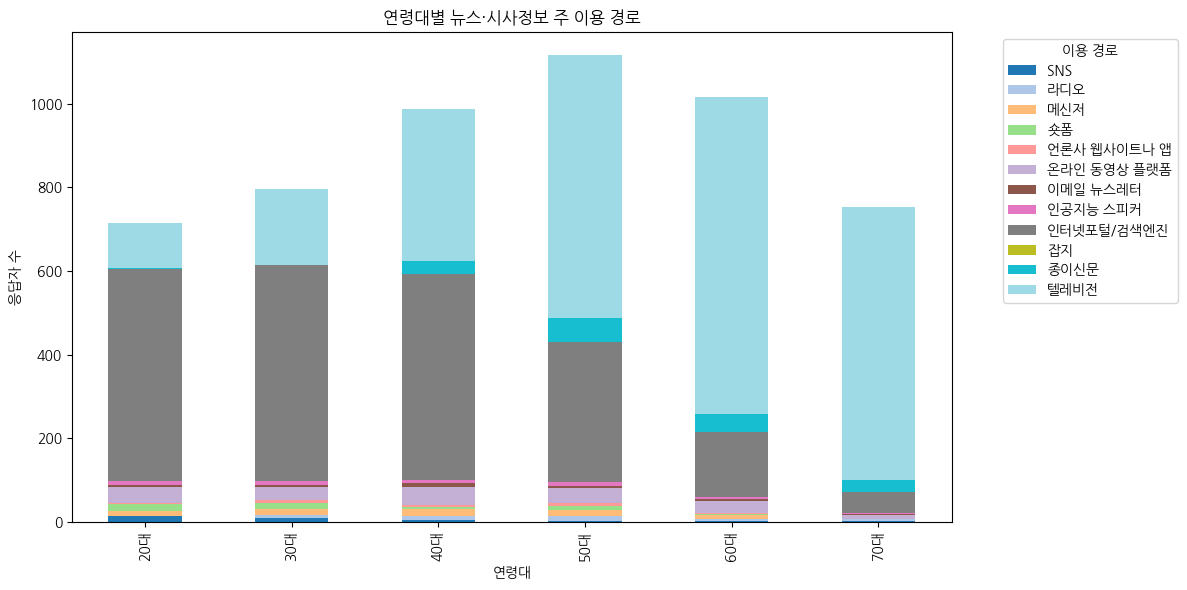

In [115]:
import matplotlib.pyplot as plt

stats = new_data.groupby("연령대")["Q76_라벨"].value_counts().unstack(fill_value=0)

stats.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("연령대별 뉴스·시사정보 주 이용 경로")
plt.xlabel("연령대")
plt.ylabel("응답자 수")
plt.legend(title="이용 경로", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

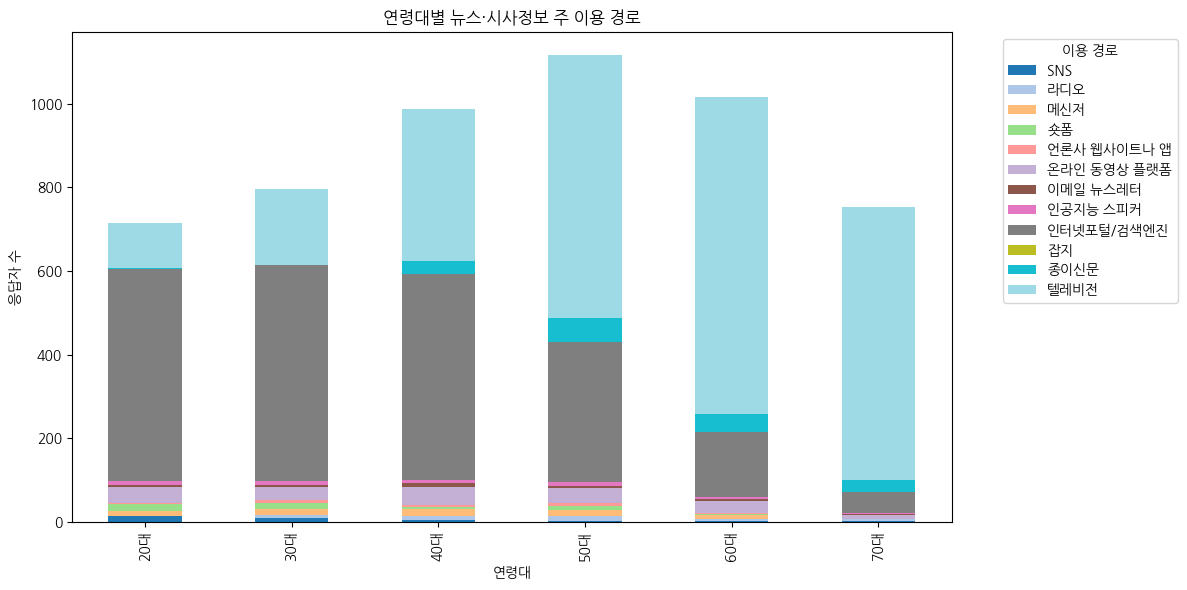

In [116]:
import matplotlib.pyplot as plt

stats.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("연령대별 뉴스·시사정보 주 이용 경로")
plt.xlabel("연령대")
plt.ylabel("응답자 수")
plt.legend(title="이용 경로", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [117]:
new_data

,DQ3,Q76,Q26_1,Q26_2,연령대,Q76_라벨
0,34,5,1,2,30대,인터넷포털/검색엔진
1,36,2,1,2,30대,텔레비전
2,49,5,,2,40대,인터넷포털/검색엔진
3,43,5,1,,40대,인터넷포털/검색엔진
4,53,3,1,,50대,라디오
...,...,...,...,...,...,...
5475,54,2,1,,50대,텔레비전
5476,48,2,1,,40대,텔레비전
5477,55,2,1,,50대,텔레비전
5478,61,2,,,60대,텔레비전


In [133]:
count_q26_1 = new_data["Q26_1"].count()
print("Q26_1에서 1의 응답 수:", count_q26_1)

Q26_1에서 1의 응답 수: 5480


In [124]:
age_counts = combined['연령대'].value_counts().sort_index()
age_counts

연령대
20대    1430
30대    1592
40대    1976
50대    2232
60대    2030
70대    1506
Name: count, dtype: int64

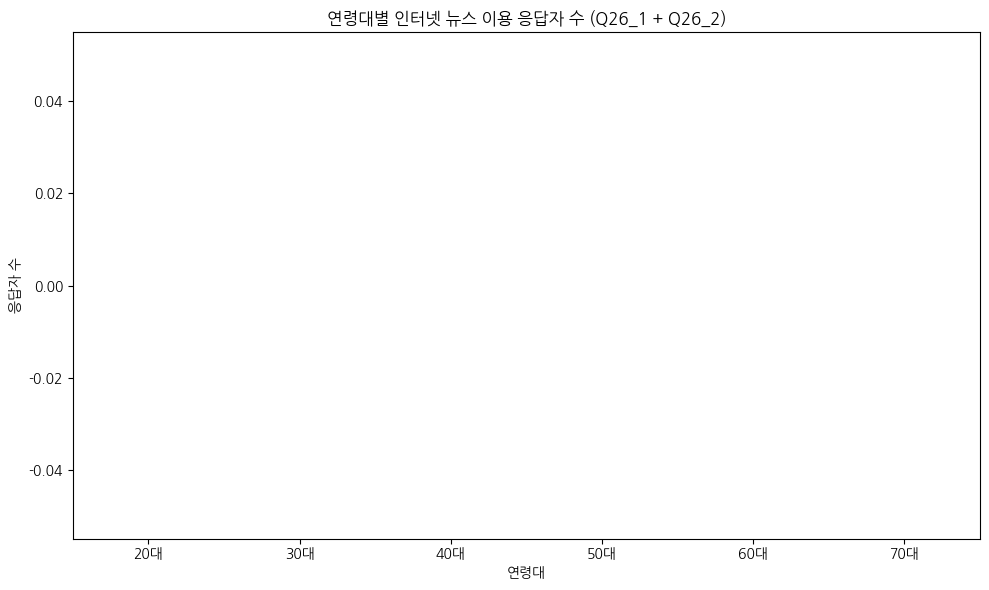

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
age_counts.plot(kind='bar', color='steelblue')
plt.title("연령대별 인터넷 뉴스 이용 응답자 수")
plt.xlabel("연령대")
plt.ylabel("응답자 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()